# Evaluation of MSSW on SEA

## Imports

In [1]:
import numpy as np
import pandas as pd
import sklearn

## SEA dataset locations

In [2]:
abrupt_sea_path = '../Datasets_concept_drift/synthetic_data/abrupt_drift/sea_1_abrupt_drift_0_noise_balanced.arff'
gradual_sea_paths = [
    '../Datasets_concept_drift/synthetic_data/gradual_drift/sea_1_gradual_drift_0_noise_balanced_05.arff',
    '../Datasets_concept_drift/synthetic_data/gradual_drift/sea_1_gradual_drift_0_noise_balanced_1.arff',
    '../Datasets_concept_drift/synthetic_data/gradual_drift/sea_1_gradual_drift_0_noise_balanced_5.arff',
    '../Datasets_concept_drift/synthetic_data/gradual_drift/sea_1_gradual_drift_0_noise_balanced_10.arff',
    '../Datasets_concept_drift/synthetic_data/gradual_drift/sea_1_gradual_drift_0_noise_balanced_20.arff'
]
all_sea_data_paths = [abrupt_sea_path] + gradual_sea_paths

## Accept and preprocess SEA datasets

In [3]:
from eval_helpers import accepting
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


sea_reference_batches = {}
sea_testing_batches = {}
for sea_path in all_sea_data_paths:
    df_x, df_y = accepting.get_clean_df(sea_path)
    df_y = pd.DataFrame(LabelEncoder().fit_transform(df_y))

    df_x_ref, df_x_test, df_y_ref, df_y_test = sklearn.model_selection.train_test_split(
        df_x, df_y, test_size=0.7, shuffle=False)
    
    reference_data = df_x_ref.to_numpy()
    testing_data = df_x_test.to_numpy()
    num_ref_batches = 3
    num_test_batches = 7
    ref_batches = np.array_split(reference_data, num_ref_batches)
    test_batches = np.array_split(testing_data, num_test_batches)
    
    sea_reference_batches[sea_path] = ref_batches
    sea_testing_batches[sea_path] = test_batches


df         attrib1   attrib2   attrib3      class
0      7.308782  4.100808  2.077148  b'groupB'
1      5.833539  0.422983  7.616747  b'groupA'
2      1.397627  6.949480  8.052278  b'groupB'
3      2.750299  0.753878  6.105915  b'groupA'
4      2.049135  6.233638  1.847071  b'groupB'
...         ...       ...       ...        ...
99995  4.636430  6.639370  0.066740  b'groupB'
99996  4.251993  3.351235  5.652197  b'groupA'
99997  4.131405  6.371722  3.125554  b'groupB'
99998  1.404214  4.392506  9.298558  b'groupA'
99999  7.231749  8.770465  3.925490  b'groupB'

[100000 rows x 4 columns]


C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df         attrib1   attrib2   attrib3      class
0      7.308782  4.100808  2.077148  b'groupB'
1      5.833539  0.422983  7.616747  b'groupA'
2      1.397627  6.949480  8.052278  b'groupB'
3      2.750299  0.753878  6.105915  b'groupA'
4      2.049135  6.233638  1.847071  b'groupB'
...         ...       ...       ...        ...
99995  2.074508  1.775662  1.318589  b'groupA'
99996  4.636430  6.639370  0.066740  b'groupB'
99997  4.251993  3.351235  5.652197  b'groupA'
99998  4.131405  6.371722  3.125554  b'groupB'
99999  1.404214  4.392506  9.298558  b'groupA'

[100000 rows x 4 columns]


C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df         attrib1   attrib2   attrib3      class
0      7.308782  4.100808  2.077148  b'groupB'
1      5.833539  0.422983  7.616747  b'groupA'
2      1.397627  6.949480  8.052278  b'groupB'
3      2.750299  0.753878  6.105915  b'groupA'
4      2.049135  6.233638  1.847071  b'groupB'
...         ...       ...       ...        ...
99995  2.261206  1.404770  3.977088  b'groupA'
99996  0.795885  8.915077  6.892585  b'groupB'
99997  0.353597  1.289198  0.001943  b'groupA'
99998  6.540503  5.698432  7.743243  b'groupB'
99999  2.074508  1.775662  1.318589  b'groupA'

[100000 rows x 4 columns]


C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df         attrib1   attrib2   attrib3      class
0      7.308782  4.100808  2.077148  b'groupB'
1      5.833539  0.422983  7.616747  b'groupA'
2      1.397627  6.949480  8.052278  b'groupB'
3      2.750299  0.753878  6.105915  b'groupA'
4      2.049135  6.233638  1.847071  b'groupB'
...         ...       ...       ...        ...
99995  7.680433  9.606008  5.626119  b'groupB'
99996  1.336234  3.864737  1.698313  b'groupA'
99997  0.541297  9.975611  6.822081  b'groupB'
99998  1.709441  4.517255  8.083470  b'groupA'
99999  0.778983  9.326919  2.996122  b'groupA'

[100000 rows x 4 columns]


C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df         attrib1   attrib2   attrib3      class
0      7.308782  4.100808  2.077148  b'groupB'
1      5.833539  0.422983  7.616747  b'groupA'
2      1.397627  6.949480  8.052278  b'groupB'
3      2.750299  0.753878  6.105915  b'groupA'
4      2.049135  6.233638  1.847071  b'groupB'
...         ...       ...       ...        ...
99995  8.630346  3.981509  1.040496  b'groupB'
99996  0.656783  5.144250  9.648631  b'groupA'
99997  8.299312  7.466245  5.592216  b'groupB'
99998  2.728767  5.140916  0.727831  b'groupA'
99999  8.852912  3.855575  6.128628  b'groupB'

[100000 rows x 4 columns]


C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


df         attrib1   attrib2   attrib3      class
0      7.308782  4.100808  2.077148  b'groupB'
1      5.833539  0.422983  7.616747  b'groupA'
2      1.397627  6.949480  8.052278  b'groupB'
3      2.750299  0.753878  6.105915  b'groupA'
4      2.049135  6.233638  1.847071  b'groupB'
...         ...       ...       ...        ...
99995  8.479838  4.037801  7.474048  b'groupB'
99996  0.587347  2.725972  8.395393  b'groupA'
99997  1.297264  9.227339  6.843533  b'groupB'
99998  2.009023  5.305785  1.423271  b'groupA'
99999  9.680480  4.642564  3.628668  b'groupB'

[100000 rows x 4 columns]


C:\Users\jpohl\PycharmProjects\clustering-drift-detection\mssw\eval_helpers\accepting.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.decode('utf-8')
c:\users\jpohl\pycharmprojects\clustering-drift-detection\venv\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Find the best tol and max_iter in SEA (the drift type is irrelevant)

In [50]:
from core import mssw_preprocessing
from eval_helpers import kmeans_verbose_helpers


weighted_joined_reference_data, _, _ = mssw_preprocessing.mssw_preprocess(
    sea_reference_batches[abrupt_sea_path], sea_testing_batches[abrupt_sea_path])

filename = 'sea_new_output.txt'
kmeans_verbose_helpers.write_verbose_kmeans_to_file(filename, weighted_joined_reference_data,
                             n_clusters=8, n_init=100, max_iter=500, tol=0, random_state=1053)
output_dicts = kmeans_verbose_helpers.convert_kmeans_output_file_to_dicts(filename, n_init=100)
kmeans_verbose_helpers.print_stats_from_kmeans_output_dicts(output_dicts)

random state: 1053
total number of results: 100
maximum number of iterations: 85
minimum initial inertia: 609.7320029968274
maximum initial inertia: 1517.7243528803774
number of unique final inertia values: 16
minimum final inertia: 574.9767008337368
maximum final inertia: 575.2536701263556
total number of convergences: 100
number of strict convergences: 100
number of tol-based convergences: 0


## Try different numbers of clusters

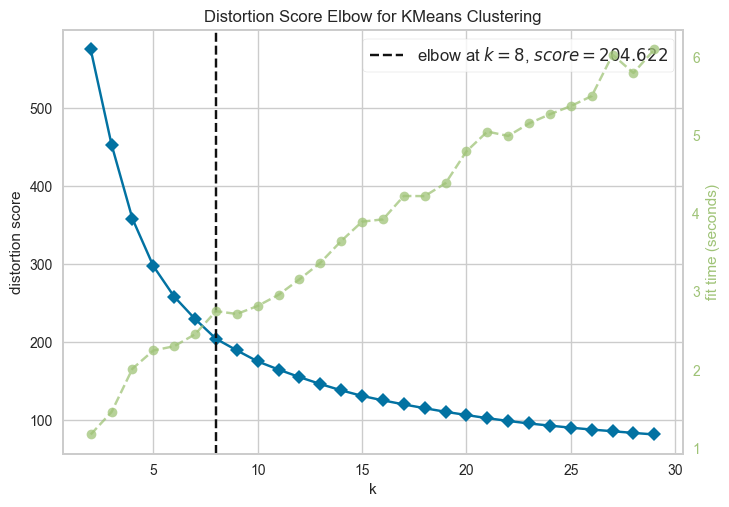

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(max_iter=10000, n_clusters=29, n_init=100,
                                  random_state=0, tol=0),
                 k=(2, 30))

In [49]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl
from sklearn.cluster import KMeans


kmeans = KMeans(
    n_init=100,
    max_iter=10000,
    tol=0,
    random_state=0
)

kelbow_visualizer(kmeans, weighted_joined_reference_data, k=(2, 30))

## Use them for the analysis

In [51]:
from core import mssw_eval


sea_stats = {}
for sea_path in all_sea_data_paths:
    runs_results_bool, final_fpr_mean, fpr_std_err, final_latency_mean, latency_std_err = \
        mssw_eval.all_drifting_batches_randomness_robust(
        sea_reference_batches[sea_path],
        sea_testing_batches[sea_path],
        n_clusters=8,
        n_init=100,
        max_iter=850,
        tol=0,
        true_drift_idx=2,
        min_runs=2
    )
    sea_stats[sea_path] = {
        'runs_results_bool': runs_results_bool,
        'final_fpr_mean': final_fpr_mean,
        'fpr_std_err': fpr_std_err,
        'final_latency_mean': final_latency_mean,
        'latency_std_err': latency_std_err
    }

print('SEA STATS')
print(sea_stats)

min_runs 2
all_av_c
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
centroid distance sums [[132.18904127 154.7846855  160.65643775 142.08579017 142.00531575
  240.84290247 154.13990526 240.98391696]]
num points in clusters [[ 910. 1125. 1155.  993.  966. 1910. 1036. 1905.]]
all_av_c[:, i:(i + 1)]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Av_c.T
[[0.14526268]
 [0.13758639]
 [0.13909648]
 [0.1430874 ]
 [0.14700343]
 [0.12609576]
 [0.14878369]
 [0.12650074]]
centroid distance sums [[137.20659832 152.71986683 153.87245404 139.05689357 151.97311216
  234.45119612 150.36535829 243.25241469]]
num points in clusters [[ 933. 1098. 1102.  963. 1052. 1871. 1037. 1944.]]
all_av_c[:, i:(i + 1)]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Av_c.T
[[0.14705959]
 [0.13908913]
 [0.13963018]
 [0.14439968]
 [0.14446113]
 [0.12530796]
 [0.14500035]
 [0.12512984]]
centroid distance sums [[138.42310609 163.59184503 168.03644569 136.4056388  144.90

In [52]:
from eval_helpers import helpers


final_result_dict = {
    'type_of_data': [], 'dataset': [], 'drift': [], 'width': [], 'encoding': [],
    'n_init': [], 'max_iter': [], 'tol': [],
    'FPR_mean': [], 'latency_mean': []
}

for data_path, stats_dict in sea_stats.items():
#     data_filename = data_path.split('/')[-1]
#     type_of_data = data_path.split('/')[2].split('_')[0]  # synthetic or real-world
#     dataset_name = data_filename.split('_')[0]  # sea, agraw1, agraw2
#     drift_type = data_path.split('/')[3].split('_')[0]
#     drift_width = '0' if drift_type == 'abrupt' else data_filename.split('_')[-1].split('.')[0]
#     drift_width = 0.5 if drift_width == '05' else float(drift_width)
    synthetic_filename_info = helpers.synthetic_data_information(data_path)
    encoding = 'exclude'
    fpr_mean = float(stats_dict['final_fpr_mean'])
    latency_mean = float(stats_dict['final_latency_mean'])
    
    final_result_dict['type_of_data'].append(synthetic_filename_info['type_of_data'])
    final_result_dict['dataset'].append(synthetic_filename_info['dataset_name'])
    final_result_dict['drift'].append(synthetic_filename_info['drift_type'])
    final_result_dict['width'].append(synthetic_filename_info['drift_width'])
    final_result_dict['encoding'].append(encoding)
    final_result_dict['n_init'].append(100)
    final_result_dict['max_iter'].append(850)
    final_result_dict['tol'].append(0)
    final_result_dict['FPR_mean'].append(fpr_mean)
    final_result_dict['latency_mean'].append(latency_mean)
    
final_result_df = pd.DataFrame.from_dict(final_result_dict)
sorted_final_result_df = final_result_df.sort_values(['drift', 'dataset', 'encoding', 'width'])
final_result_df.to_csv('sea_jupyter_results2.csv', index=False)

### Inspect MSSW to obtain meaning

In [5]:
n_clusters=8

In [43]:
from core import mssw
import importlib
importlib.reload(mssw)
from matplotlib import pyplot as plt


drifts_detected, LCL_Av_s, UCL_Av_s, all_av_c, all_av_sr, all_cluster_num_points = \
    mssw.all_drifting_batches_return_plot_data(
        sea_reference_batches[all_sea_data_paths[0]],
        sea_testing_batches[all_sea_data_paths[0]],
        n_clusters=n_clusters,
        n_init=100,
        max_iter=850,
        tol=0
    )

mean_av_s 0.13669501526920455
mean_mr 0.000611138941944464


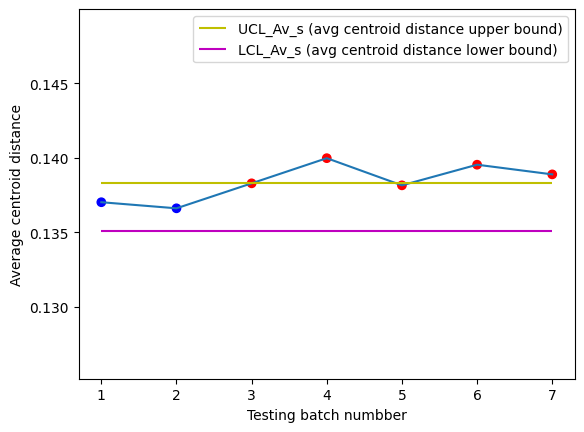

In [48]:
ymin = np.min(all_av_c)
ymax = np.max(all_av_c)

# https://matplotlib.org/2.1.1/gallery/showcase/bachelors_degrees_by_gender.html#sphx-glr-gallery-showcase-bachelors-degrees-by-gender-py
colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
          '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
          '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
          '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']

drift_colors = 2 * ['blue'] + 5 * ['red']
plt.scatter(range(1, 8), all_av_sr[0][-7:], color=drift_colors)
plt.plot(range(1, 8), all_av_sr[0][-7:])
plt.hlines(UCL_Av_s, 1, 7, label='UCL_Av_s (avg centroid distance upper bound)', color='y')
plt.hlines(LCL_Av_s, 1, 7, label='LCL_Av_s (avg centroid distance lower bound)', color='m')
plt.ylim((ymin, ymax))
plt.xlabel('Testing batch numbber')
plt.ylabel('Average centroid distance')
plt.rcdefaults()
# plt.rcParams['figure.figsize'] = (4, 3)
plt.legend()
plt.savefig('plots/mssw_sea_abr_plot.png')
plt.show()

# for i in range(n_clusters):
#     plt.plot(range(1, 11), all_av_c[i],
#              color=colors[i], marker='o')
# plt.ylim((ymin, ymax))
# plt.show()
#
# for i in range(n_clusters):
#     plt.plot(range(1, 11), all_cluster_num_points[i],
#              color=colors[i], marker='o')
plt.show()